In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', None)

import warnings
warnings.filterwarnings("ignore")

/kaggle/input/summer-olympics-medals/Summer-Olympic-medals-1976-to-2008.csv


This is how our data looks like - 11 columns, 15316 rows, it contains information about City of Olympics, year, sport, its disciplines and events, athletes' names, gender of athletes (and event gender wich is basically the same as gender), country and its code, and medals. Let' explore it.

In [2]:
df = pd.read_csv('/kaggle/input/summer-olympics-medals/Summer-Olympic-medals-1976-to-2008.csv', 
                 encoding = "ISO-8859-1")
df.head()

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15433 entries, 0 to 15432
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   City          15316 non-null  object 
 1   Year          15316 non-null  float64
 2   Sport         15316 non-null  object 
 3   Discipline    15316 non-null  object 
 4   Event         15316 non-null  object 
 5   Athlete       15316 non-null  object 
 6   Gender        15316 non-null  object 
 7   Country_Code  15316 non-null  object 
 8   Country       15316 non-null  object 
 9   Event_gender  15316 non-null  object 
 10  Medal         15316 non-null  object 
dtypes: float64(1), object(10)
memory usage: 1.3+ MB


We have systematic absence of some values, there should be 15432 rows, but only 15316 are not nulls. Let's get rid of the null values.

In [4]:
df.dropna(axis=0, inplace=True)
df['Count']=1 #adding an extra column
df.shape

(15316, 12)

# **1. What about quantity of medals and overall athletes contribution through time?**

<AxesSubplot:xlabel='Year', ylabel='count'>

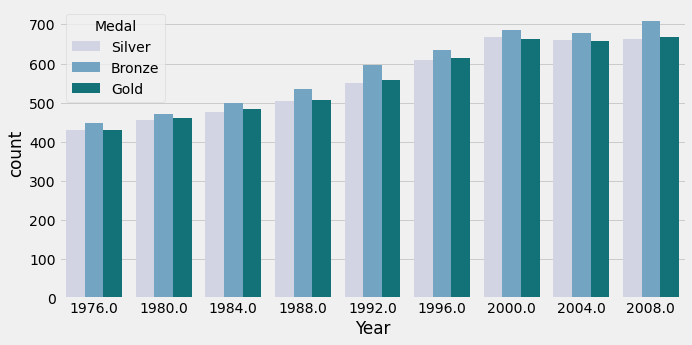

In [5]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Year', hue='Medal', palette=sns.color_palette("PuBuGn", 3))

Looking at the graph above we can clearly see increasing of athletes contribution and increasing tendency of numbers of medals.

Now let's create a table that shows number of medals in categories and total medals per country.

In [6]:
df1 = pd.get_dummies(df, columns = ['Medal'])
country_list = list(df1['Country'].unique())
medal_gold = []
medal_silver = []
medal_bronze = []
for i in country_list:
    x = df1[df1["Country"] == i]
    gold = x.Medal_Gold.sum()
    medal_gold.append(gold)
    silver = x.Medal_Silver.sum()
    medal_silver.append(silver)
    bronze = x.Medal_Bronze.sum()
    medal_bronze.append(bronze)

med = pd.DataFrame({"country": country_list,
    "medal_gold": medal_gold, 'medal_silver': medal_silver,
    'medal_bronze': medal_bronze}) 
med['medal_total'] = med.medal_gold + med.medal_silver + med.medal_bronze
med = med.sort_values(by="medal_total", ascending=False)
med

,country,medal_gold,medal_silver,medal_bronze,medal_total
2,United States,928,583,481,1992
1,Soviet Union,439,285,297,1021
5,Australia,216,270,312,798
77,Germany,237,176,278,691
50,China,234,252,193,679
...,...,...,...,...,...
54,Cote d'Ivoire,0,1,0,1
69,Djibouti,0,0,1,1
70,Senegal,0,1,0,1
73,Virgin Islands*,0,1,0,1


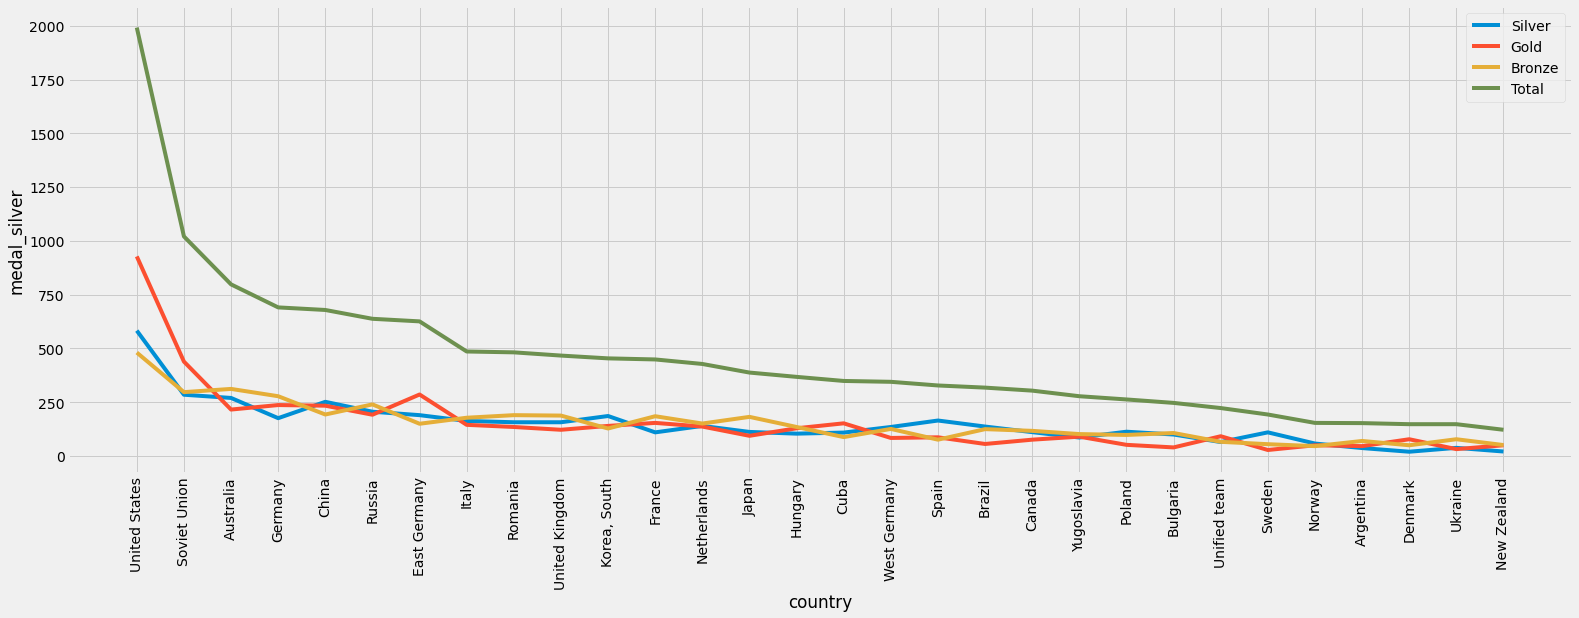

In [7]:
#Let's have a closer look at the top 30 countries:
med_30 = med[:30]
plt.figure(figsize=(24,8))
plt.xticks(rotation=90)
sns.lineplot(data=med_30, x="country", y="medal_silver")
sns.lineplot(data=med_30, x="country", y="medal_gold")
sns.lineplot(data=med_30, x="country", y="medal_bronze")
sns.lineplot(data=med_30, x="country", y="medal_total")
plt.legend(["Silver", 'Gold', 'Bronze', 'Total'])

Here it is obvious that the most Summer Olympic medals went to the United States. And it looks like a huge difference between the first and second places. But is that really so? We have political and economical reasons due to which some countries participated only a few times, for example, Soviet Union disappeared in 1991 (and participated only 4 times), such countries like Ukraine, Russia and Belarus started participating only in 1996. And Germany showed great results being separated into East and West Germany. If we added the results of Germany, East and West Germany, we would get 1662 medals in total, which is not that far from the United States' total result.

The graph below shows medals of countries by year for those countries which got more than 50 medals in total. We suppose that in the years where there are no medals, those countries did not participate.

Text(0.5, 1.0, 'Medal count trend of countries with medals greater than 50')

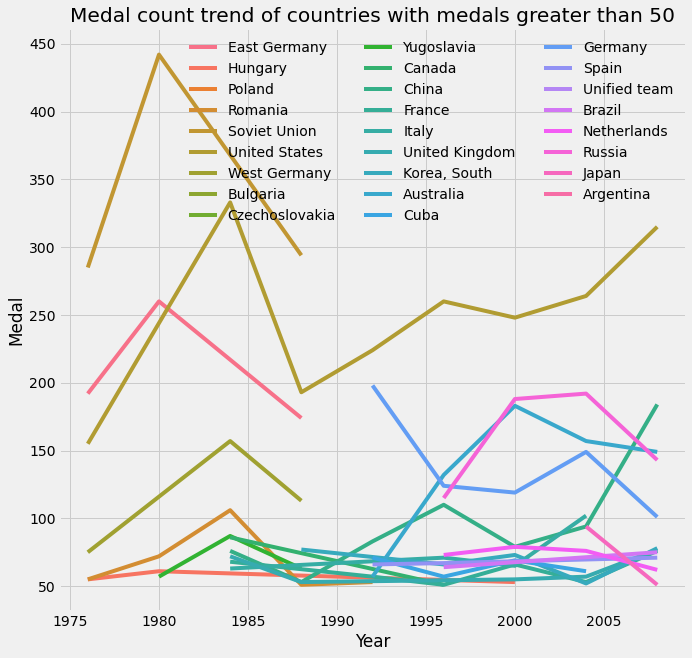

In [8]:
country_medal_count = df.groupby(['Year','Country'])['Medal'].count().reset_index()
country_medal_count.sort_values(by = 'Year')

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot()
sns.lineplot( x = 'Year', y = 'Medal', hue = 'Country', 
    data = country_medal_count[country_medal_count['Medal'] > 50])
plt.legend(ncol = 3, frameon = False, title = '')
plt.title('Medal count trend of countries with medals greater than 50')

Continuing the previous question we would like to see at the medals ratio for countries per year. For example, having  500 medals when you participated 2 times is not the same if you have participated 5 times. Ratio would be totally different. Let's have look at the best participants.

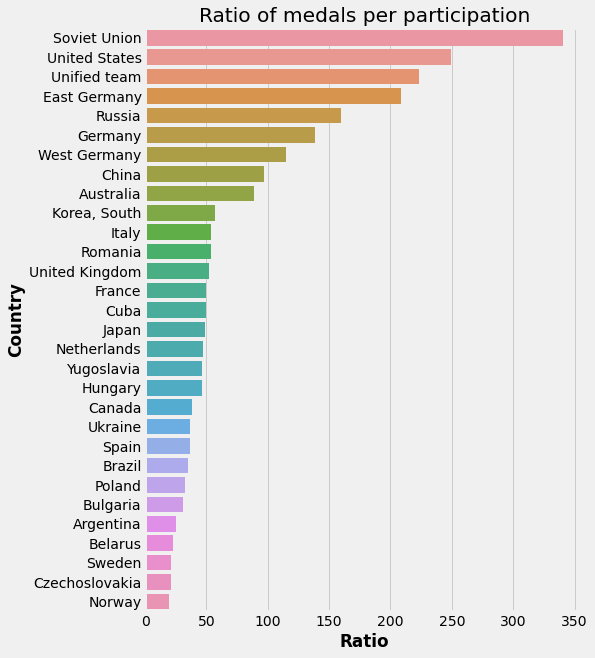

In [9]:
country_medal_count

l = list(country_medal_count.Country.unique())
ratio = []
for i in l:
    x = country_medal_count[country_medal_count["Country"] == i]
    medals = sum(x.Medal)/len(x)
    ratio.append(medals)

med_ratio = pd.DataFrame({"country": l,
    "ratio": ratio}) 

med_ratio = med_ratio.sort_values(by="ratio", ascending=False)
med_ratio = med_ratio[:30]

plt.figure(figsize=(7, 10))
sns.barplot(y='country', x = 'ratio', data = med_ratio)
plt.title('Ratio of medals per participation')
plt.xlabel('Ratio', fontweight='bold')
plt.ylabel('Country', fontweight='bold');

Wow! The Soviet Union is much better than the United States. The difference is ~90 medals per year on the graph.

Now we are intereted at looking at relative champions, which countries have the highest percent of gold medals among their total medals. The results for top 30 countries are in the table below (the index in top 30 is also included).

In [10]:
medal_gold_ = []
medal_silver_ = []
medal_bronze_ = []
country_list_ = list(med_30['country'])
for i in country_list_:
    x = df1[df1["Country"] == i]
    gold = sum(x.Medal_Gold)/len(x)
    medal_gold_.append(gold)
    silver = x.Medal_Silver.sum()/len(x)
    medal_silver_.append(silver)
    bronze = x.Medal_Bronze.sum()/len(x)
    medal_bronze_.append(bronze)
medal_gold_
med_ = pd.DataFrame({"country": country_list_,
    "medal_gold": medal_gold_, 'medal_silver': medal_silver_,
    'medal_bronze': medal_bronze_}) 

med_ = med_.sort_values(by="medal_gold", ascending=False)
med_30_ = med_[:30]
med_30_

,country,medal_gold,medal_silver,medal_bronze
27,Denmark,0.527027,0.135135,0.337838
0,United States,0.465863,0.292671,0.241466
6,East Germany,0.456869,0.303514,0.239617
15,Cuba,0.435530,0.312321,0.252149
1,Soviet Union,0.429971,0.279138,0.290891
23,Unified team,0.412556,0.291480,0.295964
29,New Zealand,0.409836,0.172131,0.418033
14,Hungary,0.350543,0.282609,0.366848
4,China,0.344624,0.371134,0.284242
11,France,0.342984,0.244989,0.412027


Text(0.5, 0, 'Gold/Silver/Bronze ratio')

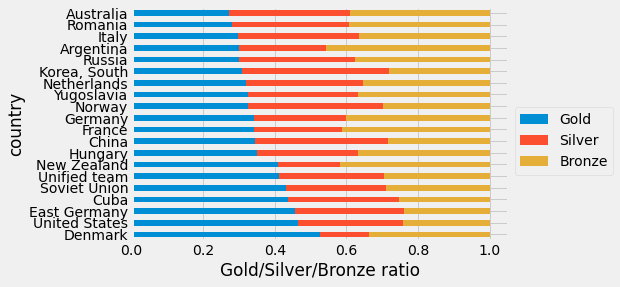

In [11]:
med_30_.set_index('country', inplace=True)
med_30_[:20].apply(lambda x:x/x.sum(), axis=1).plot(kind='barh', stacked=True, legend=False)
plt.legend(['Gold', 'Silver', 'Bronze'], bbox_to_anchor=(1.0, 0.6))
plt.xlabel('Gold/Silver/Bronze ratio')

# **2. Medal distribution within Sports**

Which sport activities get the most medals? The graph below shows that Aquatics climbs the number one throne. Well, these are summer Olympics after all. Athletics and Rowing are also in top 3. Medal distribution within particular sports is almost equal. There are only Boxing and Judo that have more bronze medals than gold or silver ones.

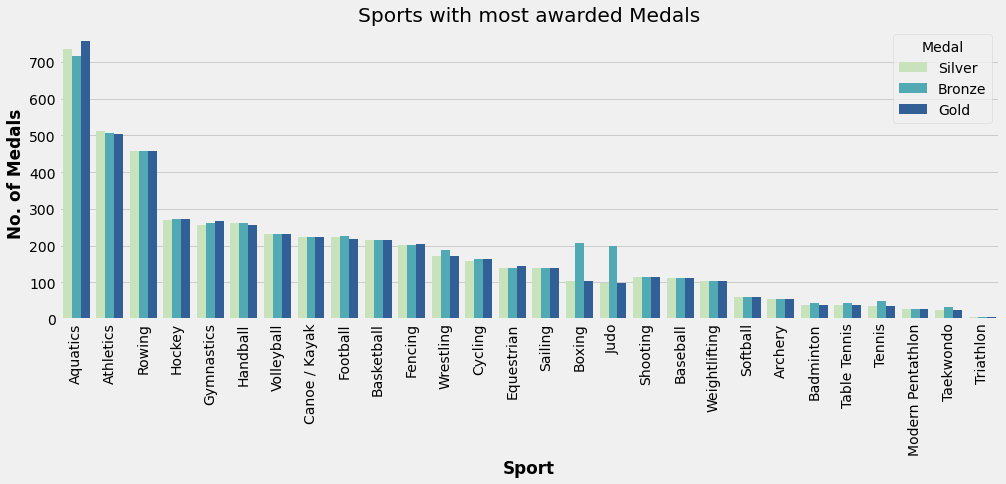

In [12]:
plt.figure(figsize=(15, 5))
highest_sport = df['Sport'].value_counts().index
sns.countplot(data=df, x='Sport', hue = 'Medal', order=highest_sport, 
              palette=sns.color_palette("YlGnBu", 3))
plt.xticks(rotation=90)
plt.title('Sports with most awarded Medals')
plt.xlabel('Sport', fontweight='bold')
plt.ylabel('No. of Medals', fontweight='bold');

# **3. Sports and Gender distribution**

Here is nothing unusual  - Baseball includes only men athletes, Softball - only women. And mostly there are more male athletes than female ones. Did it always happen like that? Let's check.

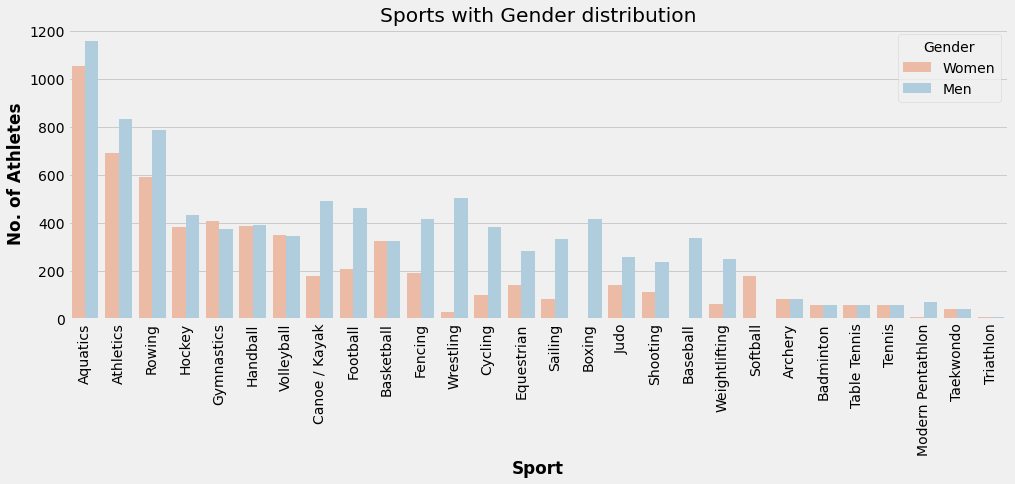

In [13]:
plt.figure(figsize=(15, 5))
highest_sport = df['Sport'].value_counts().index
sns.countplot(data=df, x='Sport', hue = 'Gender', order=highest_sport, 
              palette=sns.color_palette("RdBu", 2))
plt.xticks(rotation=90)
plt.title('Sports with Gender distribution')
plt.xlabel('Sport', fontweight='bold')
plt.ylabel('No. of Athletes', fontweight='bold');

In [14]:
gender_group = df.groupby(['Sport','Year', 'Gender']).size().unstack()
gender_group.reset_index(inplace=True)
gender_group.fillna(0, inplace=True)

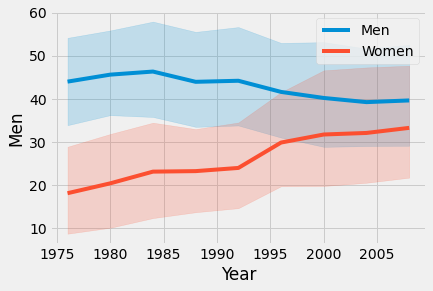

In [15]:
sns.lineplot(data=gender_group, x="Year", y="Men")
sns.lineplot(data=gender_group, x="Year", y="Women")
plt.legend(["Men", 'Women'])

The graph above shows mean values for men and women per year. The general tendency is that number of female participants is increasing, especially in 1984 and 1996. The number of male medalists is slowly decreasing, especially after year 1992. 

The graph below confirms the rise of number of women who got medals (from less than 400 to more than 900) while the male participants' medal numbers are within the approximate range 900 - 1100.

<AxesSubplot:xlabel='Year', ylabel='count'>

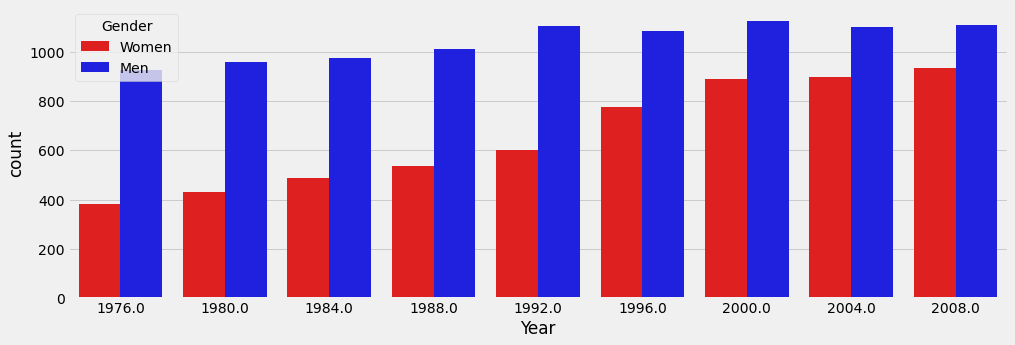

In [16]:
plt.figure(figsize=(15, 5))
sns.countplot(data=df, x='Year', hue='Gender', palette=['red','blue'])

# **4. Gender and Sports per year.**

<AxesSubplot:xlabel='Year', ylabel='Men'>

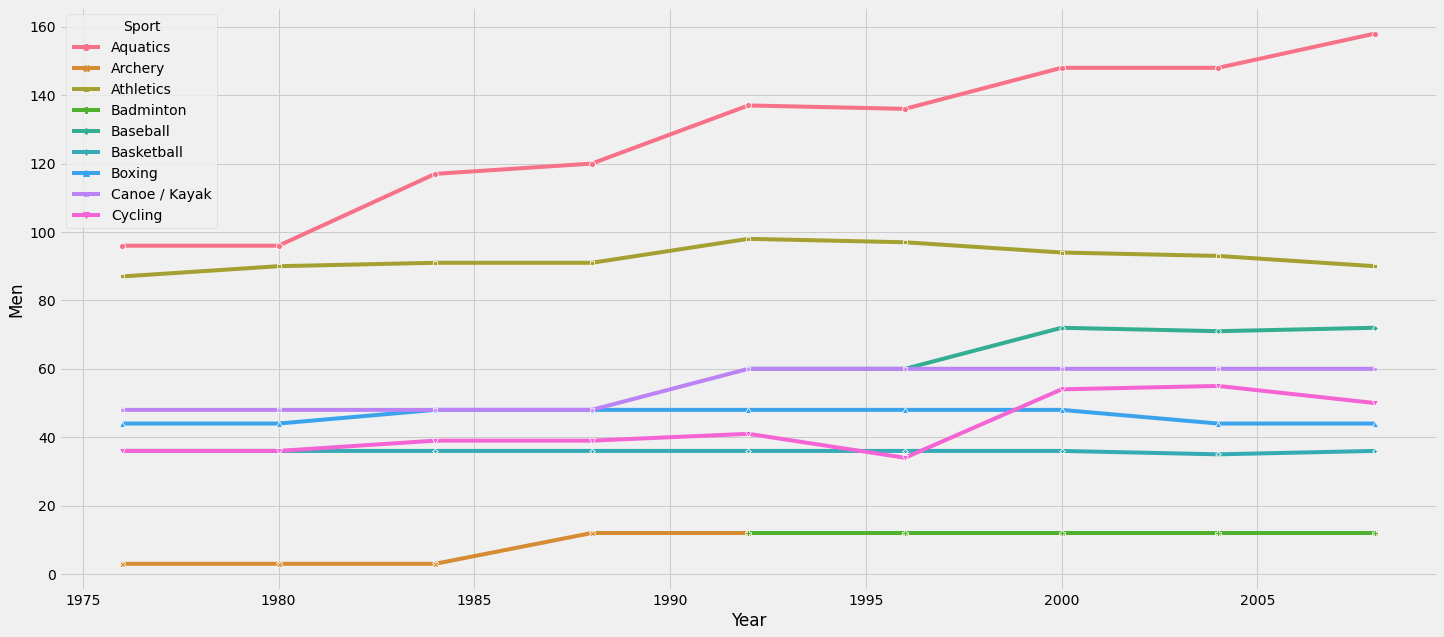

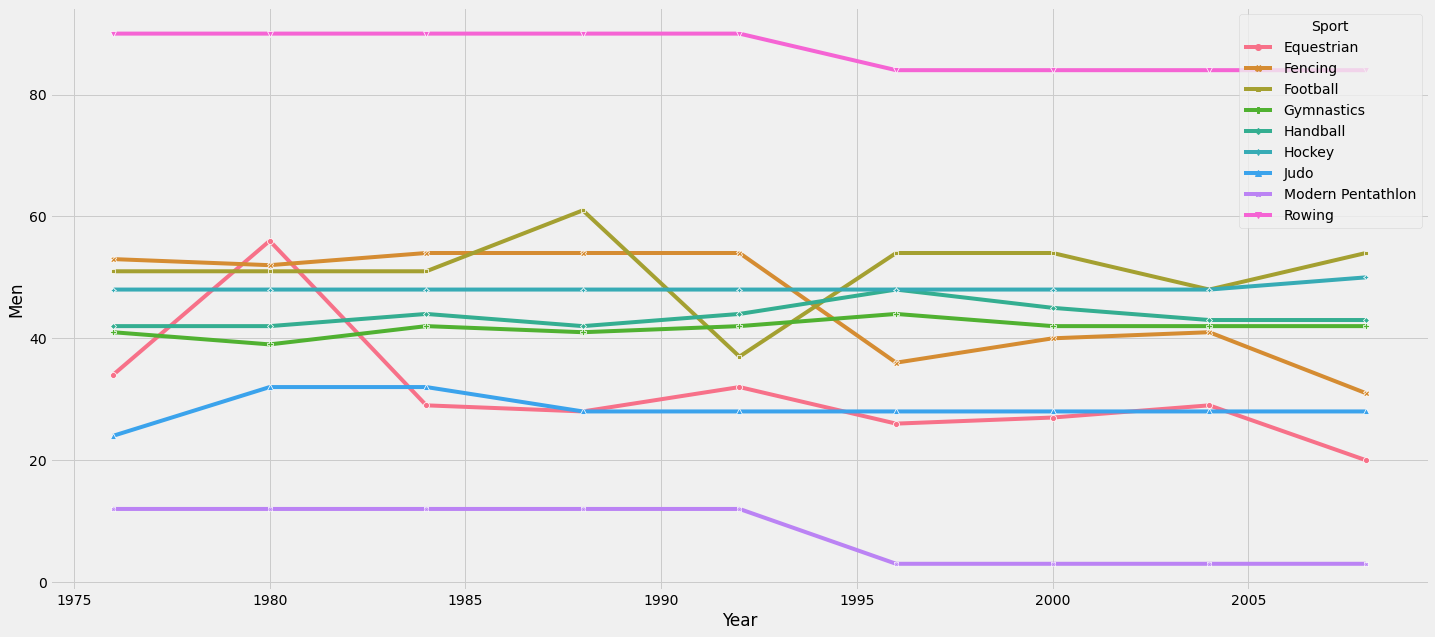

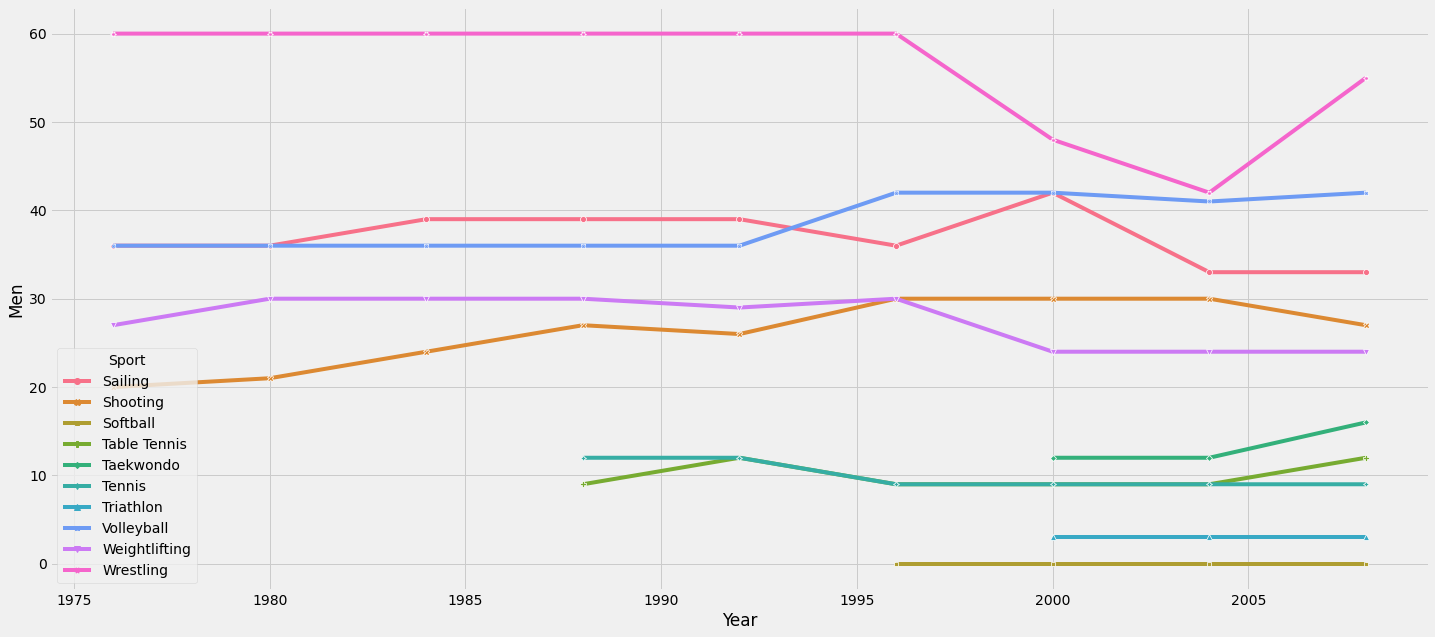

In [17]:
plt.figure(figsize=(22,10))
sns.lineplot(x = 'Year', y = 'Men', hue = 'Sport',
    data = gender_group[:73],style = "Sport", 
    markers=True, dashes=False)

plt.figure(figsize=(22,10))
sns.lineplot(x = 'Year', y = 'Men', hue = 'Sport',
    data = gender_group[73:154],style = "Sport", 
    markers=True, dashes=False)

plt.figure(figsize=(22,10))
sns.lineplot(x = 'Year', y = 'Men', hue = 'Sport',
    data = gender_group[154:],style = "Sport", 
    markers=True, dashes=False)

**For men**, we can conclude that there are 20-60 male medalists at every Olympics edition with a small difference every time (within normal) and there is permanent increasing in Aquatics which could be related with adding new activities. Also, not all of the Sports took place starting in 1976, some of them were added to Olympics programm later.

Let's have a look at **women's numbers.**

<AxesSubplot:xlabel='Year', ylabel='Women'>

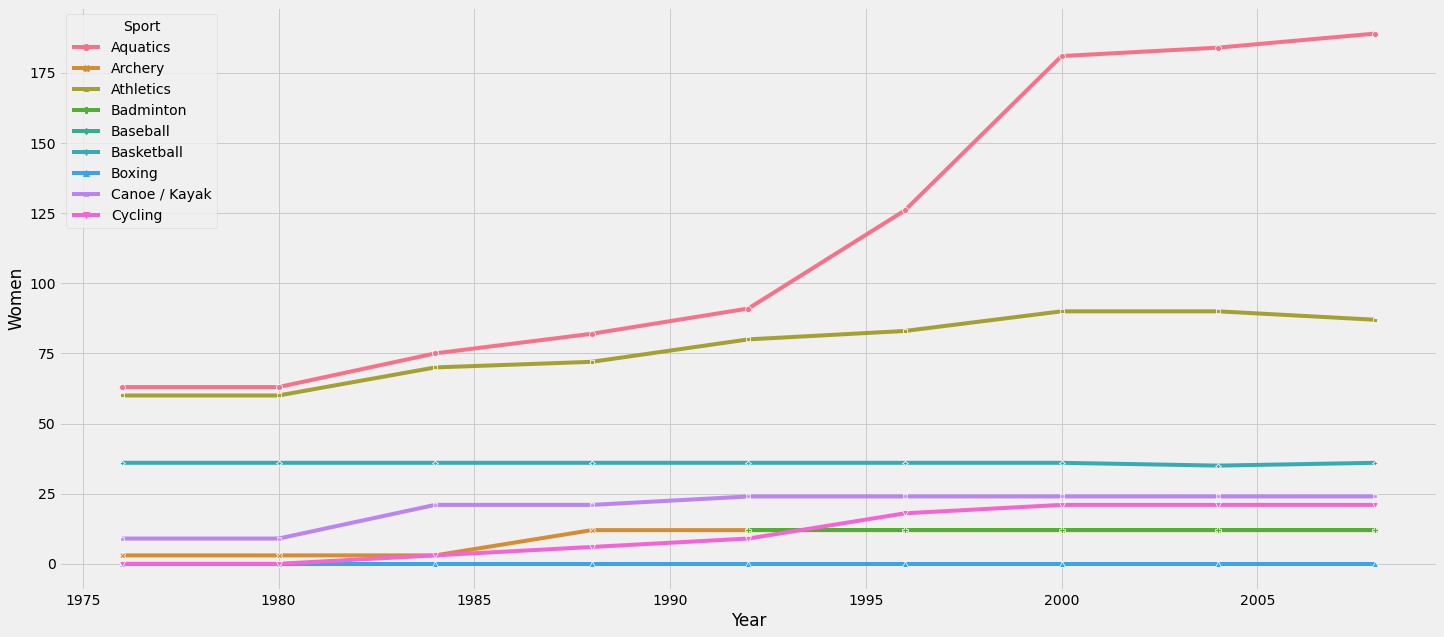

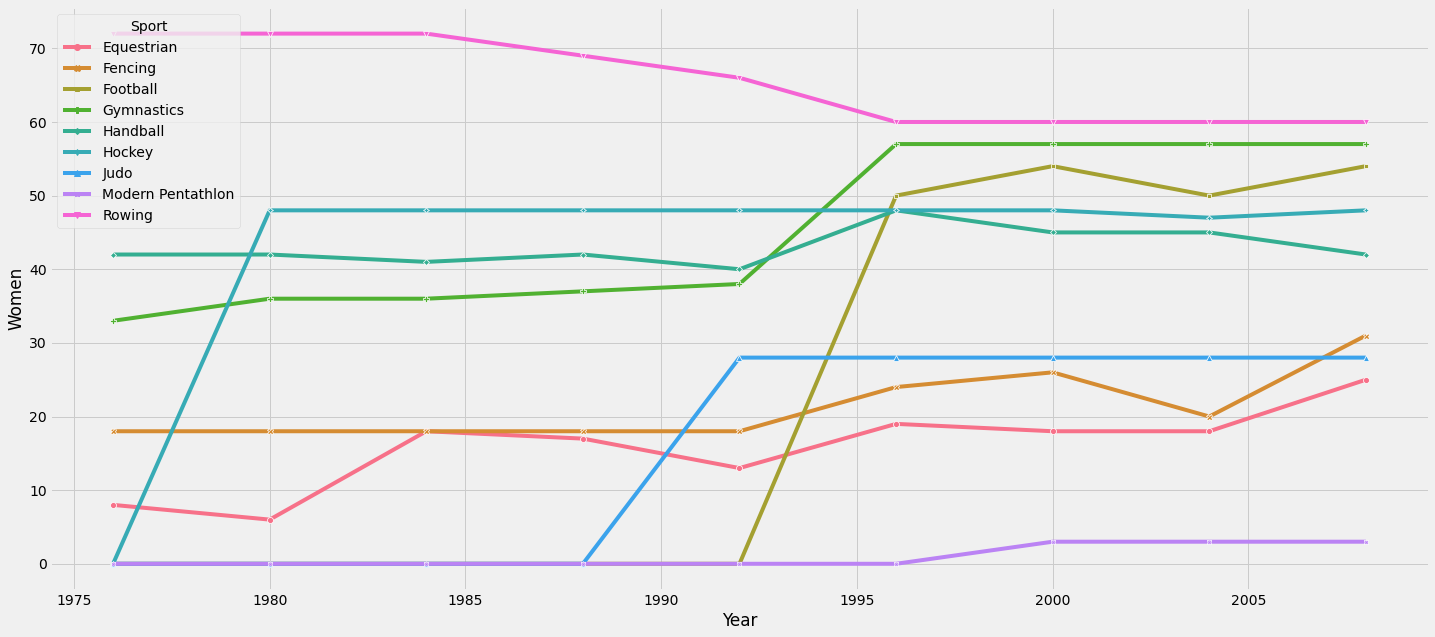

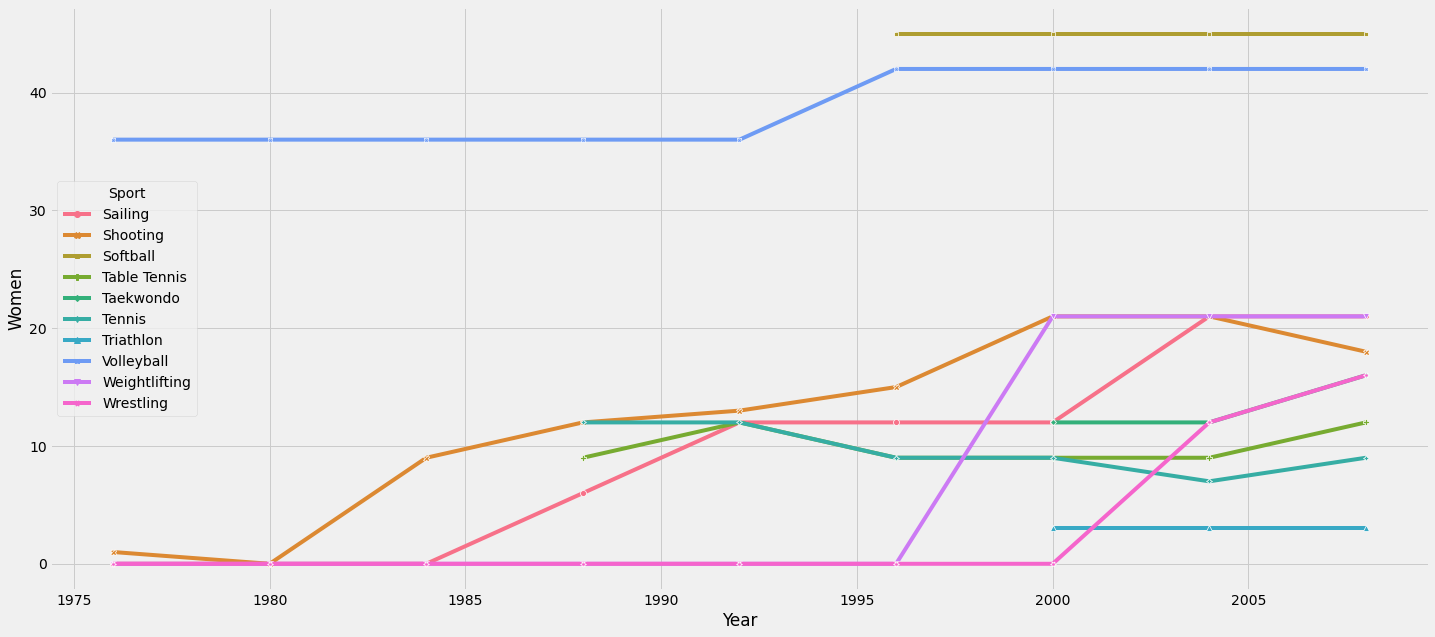

In [18]:
plt.figure(figsize=(22,10))
sns.lineplot(x = 'Year', y = 'Women', hue = 'Sport',
    data = gender_group[:73],style = "Sport", 
    markers=True, dashes=False)

plt.figure(figsize=(22,10))
sns.lineplot(x = 'Year', y = 'Women', hue = 'Sport',
    data = gender_group[73:154],style = "Sport", 
    markers=True, dashes=False)

plt.figure(figsize=(22,10))
sns.lineplot(x = 'Year', y = 'Women', hue = 'Sport',
    data = gender_group[154:],style = "Sport", 
    markers=True, dashes=False)

That looks very interesting - the lines are not that stable as we saw for men. Aquatics like demonstrates sharp increasing, in the last years there are even more women than men. There is also drastic increasing of female medalists in Football, Judo, Hockey, and high starting number at the appearing Softball in the program.  

# **5. The best athletes.**

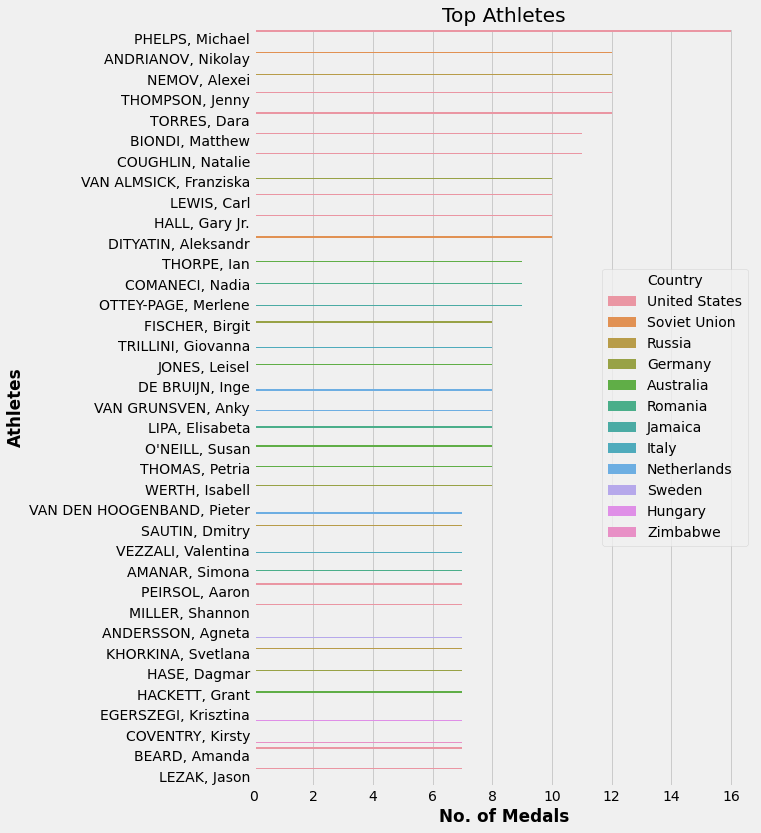

In [19]:
top_athletes = df1.groupby(['Athlete', 'Country','Count']).size()
top_athletes = pd.DataFrame(top_athletes)
top_athletes.reset_index(inplace=True)
top_athletes = top_athletes[top_athletes[0]>6].sort_values(by= 0, ascending = False)

#plotting
plt.figure(figsize=(8, 13))
sns.barplot(y='Athlete', x = 0, hue='Country', data = top_athletes)
plt.title('Top Athletes')
plt.xlabel('No. of Medals', fontweight='bold')
plt.ylabel('Athletes', fontweight='bold');